![ADSA Logo](http://i.imgur.com/BV0CdHZ.png?2 "ADSA Logo")

#Spring 2019 ADSA Workshop - Data Science Fundamentals Series: Numpy, Statistics and Probability

Workshop content adapted from:
* https://github.com/ADSA-UIUC/PythonWorkshop_2
* [Data Science from Scratch - First Principles with Python](http://www.amazon.com/Data-Science-Scratch-Principles-Python/dp/149190142X/)

This workshop dives into data science fundamentals - statistics and probability. We will talk about the following topics:
* How to use NumPy
* Linear Algebra
* Statistics
* Histograms
* Probability with Python

***

## An Introduction to NumPy

NumPy (or Numerical Python), is part of a great set of free scientific computing libraries called SciPy that provide mathematical and numerical functions that work very fast. NumPy is like MATLAB, and you can use it to create very powerful arrays and matrices, and it also has various kinds of optimization algorithms and linear algebra functions that are very useful for data science and analytics

In [0]:
# Let's import numpy to use some of its functions
import numpy as np

The central feature of NumPy is the array object class. Arrays are similar to lists in Python, except that every element of an array must be of the same type, typically a numeric type like `float` or `int`. Arrays make operations with large amounts of numeric data very fast and are generally much more efficient than lists.

In [0]:
my_list = [1, 4, 5, 8]
a = np.array(my_list)

print(a)

[1 4 5 8]


Array elements are accessed, sliced, and manipulated just like lists.

In [0]:
# accessing elements of the array using an index
# return the 4th element in the array (0-indexed!)
print(a[3])

# accessing multiple continuous elements of the array, also called slicing
print(a[:2])

# modifying elements of the array
a[0] = 5
print(a)

8
[1 4]
[5 4 5 8]


Note that the type of a is **`ndarray`**

In [0]:
print(type(a))

<class 'numpy.ndarray'>


This means that numpy can handle multi-dimensional arrays. Let's create a 2-dimensional array

In [0]:
b = np.array( [[1, 2, 3], [4, 5, 6]] )
print(b)

[[1 2 3]
 [4 5 6]]


In [0]:
# access the element is the first row, second column
print(b[0, 1])

2


In [0]:
# slice the array and access only the 3rd column
print(b[:, 2])

[3 6]


The **`shape`** property returns the size of each dimension of the array

In [0]:
print(a.shape)
print(b.shape)

(4,)
(2, 3)


The **`in`** statement can be used to check if values are present in the array

In [0]:
print(3 in b)

True


In [0]:
print(7 in a)

False


Arrays can be reshaped to different dimension sizes.

In [0]:
a = np.array(range(10), float)
print(a)
print(a.shape)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
(10,)


In [0]:
# reshape (10,) array to (5,2)
a = a.reshape((5, 2))
print(a)
print(a.shape)

[[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]
 [8. 9.]]
(5, 2)


We can create special matrices in NumPy too! Remember that they are still referred to as arrays in NumPy.

In [0]:
# create the identity 2-dimensional array of shape (4,4)
i = np.identity(4)
print(i)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [0]:
# create a (3,3) array with all ones
o = np.ones((3,3))
print(o)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


We can even do math operations on these arrays. All of the operations below happen element-wise. To do matrix multiplication and other matrix-specific math, we will have to use NumPy's linear algebra functions.

In [0]:
a = np.array([1,2,3], float)
b = np.array([5,2,6], float)
print(a)
print(b)

[1. 2. 3.]
[5. 2. 6.]


In [0]:
print(a + b)

[6. 4. 9.]


In [0]:
print(a - b)

[-4.  0. -3.]


In [0]:
print(a * b)

[ 5.  4. 18.]


In [0]:
print(b / a)

[5. 1. 2.]


In [0]:
print(b ** a)

[  5.   4. 216.]


***

## Linear Algebra: Vectors

Linear Algebra is very important in the context of data science. It provides concepts and structures that allow data scientists to efficiently represent data, and do various computations with them. There are two structures that we will talk about today, **vectors** and **matrices**.

Abstractly, vectors are objects that can be added together (to form new vectors) and that can be multiplied by scalars (i.e., numbers), also to form new vectors.

For example, if you have the heights, weights, and ages of a large number of people, you can treat your data as three-dimensional vectors `(height, weight, age)`. If youâre teaching a class with four exams, you can treat student grades as four-dimensional vectors `(exam1, exam2, exam3, exam4)`.

In [0]:
mike_data = np.array([70,  # inches,
                      170, # pounds,
                      40   # years
                     ])
print(mike_data)

[ 70 170  40]


To begin with, weâll frequently need to **add** two vectors. Vectors add componentwise. This means that if two vectors v and w are the same length, their sum is just the vector whose first element is `v[0] + w[0]`, whose second element is `v[1] + w[1]`, and so on. (If theyâre not the same length, then weâre not allowed to add them.)

In [0]:
# create a second vector with Adam's data
adam_data = np.array([72, 192, 31])

print(mike_data + adam_data)

[142 362  71]


Similarly we can **subtract** vectors too.

In [0]:
print(mike_data - adam_data)

[ -2 -22   9]


Weâll also need to be able to multiply a vector by a **scalar**, which we do simply by multiplying each element of the vector by that number.

In [0]:
print(2.3 * adam_data)

[165.6 441.6  71.3]


A less obvious tool is the **dot** product. The dot product of two vectors is the sum of their componentwise products. The mathematical computation for $v \cdot w$ looks like this: $v_1 w_1 + v_2 w_2 + \dots + v_n w_n$

In [0]:
print(mike_data.dot(adam_data))

38920


The dot product measures how far the vector `v` extends in the `w` direction. For example, if `w = [1, 0]` then `dot(v, w)` is just the first component of `v`. Another way of saying this is that itâs the length of the vector you would get if you projected `v` onto `w`.
![Dot Product Graph](http://i.imgur.com/jPBLBEK.png?1)

Finally, we need to be able to compute the **magnitude** of a vector. In graphical terms, it is just the length of the vector. The mathematical computation for the magnitude of a vector `v` is:
$\sqrt{v_1 ^ 2 + v_2 ^ 2 + \dots + v_n ^ 2}$

In [0]:
# print magnitude of mike_data
print(np.sqrt(mike_data[0]**2 + mike_data[1]**2 + mike_data[2]**2))

188.1488772222678


In [0]:
# another way to compute the magnitude of a vector
print(np.sqrt(mike_data.dot(mike_data)))

188.1488772222678


***

## Linear Algebra: Matrices

A matrix is a two-dimensional collection of numbers. We will represent matrices as `lists` of `lists`, with each inner list having the same size and representing a row of the matrix. If `A` is a matrix, then `A[i][j]` is the element in the `i`th row and the `j`th column. Per mathematical convention, we will typically use capital letters to represent matrices.

In [0]:
mat_a = np.array( [[1, 2], [5, 6], [14, 15]] )
mat_b = np.array( [[4, 5, 6], [8, 9, 10]] )

print("Matrix A:\n", mat_a)
print("\nMatrix B:\n", mat_b)

Matrix A:
 [[ 1  2]
 [ 5  6]
 [14 15]]

Matrix B:
 [[ 4  5  6]
 [ 8  9 10]]


To find out what the dimensions (number of rows vs. number of columns) of a matrix are, we can use the Numpy shape property.

In [0]:
print("Matrix A shape: ", mat_a.shape)
print("Matrix B shape: ", mat_b.shape)

Matrix A shape:  (3, 2)
Matrix B shape:  (2, 3)


Matrices will be important to us for several reasons.

First, we can use a matrix to represent a data set consisting of multiple vectors, simply by considering each vector as a row of the matrix. For example, if you had the heights, weights, and ages of 1,000 people you could put them in a 1,000 Ã 3 matrix:

    data = [[70, 170, 40],
            [65, 120, 26],
            [77, 250, 19],
            # ....
            ]

A differentiating feature of matrices is an operation called transpose. This swaps elements of the matrix along the leading diagonal. It can be thought of as an operation that makes all the rows - columns, and all the columns - rows. Let's see an example.

In [0]:
print("Matrix A:\n", mat_a)
print("\nMatrix A Transposed:\n", mat_a.T)

Matrix A:
 [[ 1  2]
 [ 5  6]
 [14 15]]

Matrix A Transposed:
 [[ 1  5 14]
 [ 2  6 15]]


We can run similar mathematical operations with matrices, like we did with vectors.

**Adding** and **subtracting** matrices (matrices need to have similar shapes):

In [0]:
try:
    print(mat_a + mat_b) # will throw an error
except ValueError as e:
    print("Error:", e)

Error: operands could not be broadcast together with shapes (3,2) (2,3) 


In [0]:
print(mat_a + mat_b.T)

[[ 5 10]
 [10 15]
 [20 25]]


**Element-wise multiplication**, which returns a matrix of the same dimensions.

In [0]:
print(mat_a * mat_b.T)

[[  4  16]
 [ 25  54]
 [ 84 150]]


**Matrix multiplication** is a more complex calculation, which computes a dot product of the rows of the first matrix and the columns of the second matrix, to return a new matrix. You can learn more about matrix multiplication at [Khan Academy â Basic Matrix operations](http://www.khanacademy.org/math/algebra/algebra-matrices) and [Khan Academy â Linear Algebra](http://www.khanacademy.org/math/linear-algebra).

***

## Statistics

Along with managing sets of data, python and numpy give you the tools to describe your set of data. 

Ways to describe data sets:
* Length
* Max/Min
* Mean, Median, Mode
* Dispersion (Spread) of values
* Standard Deviation


In [0]:
basic_list = [14, 7, 15, 7, 3, 5, 6, 8, 10]

In [0]:
print("length: ", len(basic_list))

length:  9


In [0]:
print("min: ", min(basic_list))
print("max: ", max(basic_list))

min:  3
max:  15


In [0]:
def mean(x):
    return sum(x) / len(x)

print("average: ", mean(basic_list))

average:  8.333333333333334


You can also easily sort lists with sorted(), which helps when defining central tendencies

In [0]:
print("original: ", basic_list)
sorted_list = sorted(basic_list)
print("sorted:   ", sorted_list)

original:  [14, 7, 15, 7, 3, 5, 6, 8, 10]
sorted:    [3, 5, 6, 7, 7, 8, 10, 14, 15]


If you already have a sorted list, you can use indexes to get the min/max values: 

In [0]:
print("Min: ", sorted_list[0])
print("Max: ", sorted_list[-1]) # 1st from last

Min:  3
Max:  15


Otherwise you can also use the `min` and `max` functions:

In [0]:
print("Min: ", min(basic_list))
print("Max: ", max(basic_list))

Min:  3
Max:  15


Finding the median is a little less straightforward, just depends on whether length is even or odd

In [0]:
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2 # the '//' makes sure result is an int
    if n % 2 == 1: # if odd, return the middle value
        return sorted_v[midpoint]
    else: # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return((sorted_v[lo] + sorted_v[hi]) / 2)

In [0]:
print("Median: ", median(basic_list))

Median:  7


The quantile of a data set returns the pth percentile value

In [0]:
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

In [0]:
print("1st Quartile (25th Percantile): ", quantile(basic_list, .25))
print("3rd Quartile (75th Percantile): ", quantile(basic_list, .75))

1st Quartile (25th Percantile):  6
3rd Quartile (75th Percantile):  10


In [0]:
def IQR(x): #IQR - interquartile range
    return quantile(x, 0.75) - quantile(x, 0.25)

In [0]:
print("Interquartile Range: ", IQR(basic_list))

Interquartile Range:  4


In addition to the many simple statistical functions you can write yourself, numpy gives you access to a lot more, including the common ones from above.

In [0]:
print("Standard Deviation: ", np.std(basic_list))

Standard Deviation:  3.7712361663282534


In [0]:
x = [14, 7, 15, 7, 3, 5, 6, 8, 10]
y = [44, 3, 7, 2, 17, 5, 3, 11, 14]
print("Correlation between x and y: \n", np.corrcoef(x, y))

Correlation between x and y: 
 [[1.         0.46158177]
 [0.46158177 1.        ]]


## Histograms
Histograms are a diagram consisting of rectangles whose area is proportional to the frequency of a variable and whose width is equal to the class interval. They are a very useful tool in visualizing data. 

In [0]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

data = [1,2,1]
bins = [0,1,2,3]
x = np.histogram(data, bins)
print(x) #output is a tuple of the number of occurences in each bin and the bins. 
        #x[0] is the frequency of each bin, x[1] is the range of each bin. 

(array([0, 2, 1]), array([0, 1, 2, 3]))


What are bins? For this example, we have 3 bins. Ranging from 0 to 1, 1 to 2, and 2 to 3, respectively. 

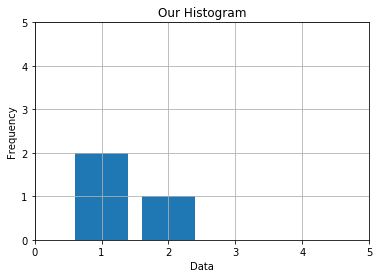

In [0]:
plt.bar(range(0,3),x[0])

plt.title('Our Histogram')
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.axis([0, 5, 0, 5])#[start of x-axis, end of x-axis, start of y-axis, end of y-axis]
plt.grid(True)

plt.show()
 

***

## Probability

Now it's time for some basic probability to help with the upcoming workshops.

What is probability? It is the process of quantifiying the uncertainty associated with a certain set of events. There are plenty of random events in nature that make probability very useful for building and evaluating models that analyze and predict on data.

### Dependent vs Independent Events

Two events E and F are independent if $P(E, F) = P(E) \cdot P(F)$.
That is, the probability of both E and F happening is $P(E) \cdot P(F)$.

E and F are dependent events when $P(E | F) = \frac{P(E,F)}{P(F)} = P(E | F) \cdot P(F)$

Let's program some examples in Python.

### Tricky Example 1: Family with two children

Let's assume the following statements:
1. Each child is equally likely to be a boy or a girl
2. The gender of the second child is independent of the gender of the first child

Based on these assumptions, we know that the event âno girlsâ has probability $\frac{1}{4}$, the event âone girl, one boyâ has probability $\frac{1}{2}$, and the event âtwo girlsâ has probability $\frac{1}{4}$.

Now, let's think about the events:
* B = "both children are girls"
* G = "the older child is a girl"
* L = "at least one of the children is a girl"

Using the concept of conditional probability, we can ask what is the likelihood of these events conditioned on each other. Or, what is the probability that both children are girls and the older child is a girl?

By mathematical calculation, we know $P(B|G) = \frac{P(B, G)}{P(G)} = \frac{P(B)}{P(G)} = \frac{1}{2}$

And this makes sense because the event B and G (âboth children are girls and the older child is a girlâ) is just the event B. (Once you know that both children are girls, itâs necessarily true that the older child is a girl.)

We could also ask about the probability of the event âboth children are girlsâ conditional on the event âat least one of the children is a girlâ (L). Surprisingly, the answer is different from before! We know that the event B and L (âboth children are girls and at least one of the children is a girlâ) is just the event B.

This means we have $P(B|L) = \frac{P(B,L)}{P(L)} = \frac{P(B)}{P(L)} = \frac{\frac{1}{4}}{\frac{3}{4}} = \frac{1}{3}$

In [0]:
# a function that randomly returns a choice between "boy" and "girl"
def random_kid():
    return np.random.choice(["boy", "girl"])

# counter variables
both_girls = 0.0
older_girl = 0.0
either_girl = 0.0

for i in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1
        

print("P(both | older):", both_girls / older_girl) # 1/2
print("P(both | either): ", both_girls / either_girl) # 1/3

P(both | older): 0.5100178536004761
P(both | either):  0.3408006362672322


### Tricky Example 2: The famous Monty Hall Problem

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1. The host, who knows what's behind the doors, opens one of the two remaining doors which will have a goat, say No. 3.

He then says to you, "Do you want to stay with door No. 1 or pick door No. 2?" Is it to your advantage to switch your choice?

Intuition says no, the chance should be the same regardless of whether you stay with your choice or switch doors

A key insight is that, under these standard conditions, there is more information about doors 2 and 3 that was not available at the beginning of the game, when the door 1 was chosen by the player: the host's deliberate action adds value to the door he did not choose to eliminate, but not to the one chosen by the contestant originally.

But how can we prove it? Let's simulate an example.

In [0]:
import random

def montyhall():
    carscore = 0.0
    goatscore = 0.0

    # Set swap for this set of runs
    swap = input("Do you want to change your choice of door for this run? (y or n) ")
    # Set number of runs
    test_count = int(input("Enter number runs: "))
    
    for count in range(test_count):
        # Set random choice
        choice = random.randint(0, 2)
        # Initialize doors list
        doors = ["", "", ""]

        # Set random door that has car prize
        car_prize_door = random.randint(0, 2)
        # Populate doors list
        for i in range(3):
            if i == car_prize_door:
                doors[i] = "Car"
            else:
                doors[i] = "Goat"

        # If player's chosen door has car inside
        if doors[choice] == "Car":
            # Set door that Monty Hall opens to either 1 or 2
            open_door = random.randint(1, 2)

            # Set open_door to 0 if the choice is the same as the random door
            # If they are not the same, the random door definitely has a "Goat"
            if choice == 1 and open_door == 1:
                open_door = 0
            if choice == 2 and open_door == 2:
                open_door = 0
        else:
            # Set open_door to the one that doesn't have "Car"
            # and is not the chosen door
            for i in range(3):
                if doors[i] != "Car" and i != choice:
                    open_door = i

        # Swap if set to "y", else do nothing
        if swap == "y":
            if choice == 0:
                if open_door == 1:
                    choice = 2
                else:
                    choice = 1
            elif choice == 1:
                if open_door == 0:
                    choice = 2
                else:
                    choice = 0
            else:
                if open_door == 0:
                    choice = 1
                else:
                    choice = 0

        if doors[choice] == "Car":
            carscore += 1
        else:
            goatscore += 1

    winpercent = (carscore / test_count) * 100
    print("\nCar Score:", carscore)
    print("Goat Score:" , goatscore)
    print("Win Percent:", winpercent)

In [0]:
montyhall()

Do you want to change your choice of door for this run? (y or n) y
Enter number runs: 3

Car Score: 3.0
Goat Score: 0.0
Win Percent: 100.0


In [0]:
montyhall()

Do you want to change your choice of door for this run? (y or n) yt
Enter number runs: 5

Car Score: 1.0
Goat Score: 4.0
Win Percent: 20.0
